# Διερευνώντας τον Καιρό στην Αθήνα

Στην εργασία αυτή θα διερευνήσετε τον καιρό στην Αθήνα σε μία περίοδο που καλύπτει πάνω από 50 χρόνια.

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr


## Ερωτήματα


### Ε1: Συγκέντρωση των Δεδομένων

Θα εργαστείτε με δεδομένα που καλύπτουν την περίοδο από το 1955 έως το 2020. Τα δεδομένα προέρχονται από δύο πηγές:

* Από το National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/) και πιο συγκεκριμένα https://www.ncdc.noaa.gov/cdo-web/search. 

* Αφού μας ενδιαφέρει η Αθήνα, θα χρησιμοποιήσετε τα δεδομένα από τον μετεωρολογικό σταθμό του Ελληνικού και θα επικεντρωθείτε στη μέση ημερήσια θερμοκρασία. Τα δεδομένα για την περίοδο 1955 έως 2020 βρίσκονται στο αρχείο `noaa_hellinikon_1995_2020.csv.zip` (αλλά μπορείτε με την ευκαιρία να δείτε τι είδους δεδομένα προσφέρει δωρεάν το NOAA, είναι παράδειγμα προς μίμηση).

* Εξετάστε την πληρότητα των δεδομένων. Τι δεδομένα λείπουν;

* Για να συμπληρώσετε όσα δεδομένα από αυτά που λείπουν γίνεται, θα χρησιμοποιήσετε ένα δεύτερο σύνολο δεδομένων διαθέσιμο στο https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f. Αυτό το σύνολο καλύπτει μόνο την περίοδο από το 2010-2019. Θα πάρετε τα δεδομένα για την Αθήνα (`athens.csv`, θα πρέπει να το κατεβάσετε εσείς). Προσοχή στην τεκμηρίωση των δεδομένων.

In [1]:
import pandas as pd

In [2]:
noaa = pd.read_csv("noaa_hellinikon_1995_2020.csv")
noaa = noaa.loc[:,["DATE","TAVG"]]
noaa

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
23246,2020-12-27,16.6
23247,2020-12-28,14.8
23248,2020-12-29,16.3
23249,2020-12-30,16.4


In [3]:
athens = pd.read_csv("athens.csv")
athens = athens.iloc[:,:4]
athens.loc[3651] = [1,2,3,4]
athens = athens.shift(1)
athens.loc[0] = athens.columns
athens.columns = ["DATE","T1","T2","T3"]
athens

,DATE,T1,T2,T3
0,2010-01-01,17.9,18.1,17.8
1,2010-01-02,15.6,15.7,15.5
2,2010-01-03,13.5,13.6,13.4
3,2010-01-04,9.5,9.6,9.5
4,2010-01-05,13.4,13.5,13.4
...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0
3648,2019-12-28,8.3,8.4,8.2
3649,2019-12-29,6.4,6.5,6.4
3650,2019-12-30,4.0,4.0,3.9


In [4]:
x1 = noaa["DATE"][noaa["DATE"] == "2009-12-31"]
x2 = noaa["DATE"][noaa["DATE"] == "2020-01-01"]
x1,x2

(20085    2009-12-31
 Name: DATE, dtype: object,
 22885    2020-01-01
 Name: DATE, dtype: object)

In [5]:
noaa.iloc[20086]

DATE    2010-01-01
TAVG          18.0
Name: 20086, dtype: object

In [6]:
temp = noaa.merge(athens, how="outer", on="DATE")
temp = temp.sort_values(by="DATE",ignore_index=True)

In [7]:
temp

,DATE,TAVG,T1,T2,T3
0,1955-01-01,NaN,NaN,NaN,NaN
1,1955-01-02,NaN,NaN,NaN,NaN
2,1955-01-03,NaN,NaN,NaN,NaN
3,1955-01-04,NaN,NaN,NaN,NaN
4,1955-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
24099,2020-12-27,16.6,NaN,NaN,NaN
24100,2020-12-28,14.8,NaN,NaN,NaN
24101,2020-12-29,16.3,NaN,NaN,NaN
24102,2020-12-30,16.4,NaN,NaN,NaN


### Ε2: Απόκλιση Καλοκαιρινών Θερμοκρασιών

Η Ελληνική Μετεωρολογική Υπηρεσία (ΕΜΥ) έχει εκδόσει μια αναφορά που πραγματεύεται τα ακραία καιρικά φαινόμενα για το 2020. Η αναφορά είναι διαθέσιμη στο http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf. Στη σελίδα 7 της αναφοράς υπάρχει ένα γράφημα το οποίο εμφανίζει την απόκλιση της μέσης ημερήσιας καλοκαιρινής θερμοκρασίας από τη θερμοκρασία αναφοράς που προκύπτει από τα έτη 1971-2000.

Θα φτιάξετε τη δική σας έκδοση του γραφήματος, χρησιμοποιώντας ως θερμοκρασία αναφοράς τη μέση ημερήσια καλοκαιρινή θερμοκρασία των ετών 1974-1999. Το γράφημά σας θα πρέπει να είναι παρόμοιο με αυτό που φαίνεται παρακάτω. Η μπλε γραμμή στο γράφημα είναι ο κυλιομένος μέσος όρος δέκα ετών (10 years rolling average). Πώς ερμηνεύετε το γράφημα;

![Mean Summer Temperature Deviation](mean_summer_temperature_difference.svg)

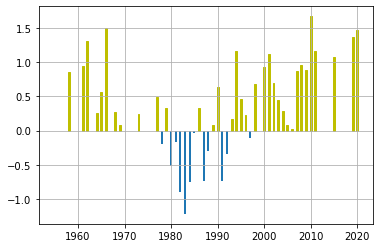

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

x = temp["DATE"]
x = pd.to_datetime(x, format="%Y-%m-%d" )
x = x.dt.year
x = x.astype(int)
y = temp["TAVG"]

newtemp = pd.DataFrame({"Date":x,"Temp":y})
avg = newtemp.query("Date >= 1974 and Date<=1999")["Temp"].mean()
newtemp["Temp"] -= avg

means = newtemp.groupby(by= "Date").agg({"Temp": lambda x: x.mean(skipna=False)})
means = means.fillna(0)

y = means.iloc[:,0]
x = y.index

barlist = plt.bar(x,y,width=0.4)
for i in range(len(barlist)):
    if y.iloc[i] > 0:
        barlist[i].set_color("y")
plt.grid()
plt.autoscale()
plt.show()

In [9]:
temp

,DATE,TAVG,T1,T2,T3
0,1955-01-01,NaN,NaN,NaN,NaN
1,1955-01-02,NaN,NaN,NaN,NaN
2,1955-01-03,NaN,NaN,NaN,NaN
3,1955-01-04,NaN,NaN,NaN,NaN
4,1955-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
24099,2020-12-27,16.6,NaN,NaN,NaN
24100,2020-12-28,14.8,NaN,NaN,NaN
24101,2020-12-29,16.3,NaN,NaN,NaN
24102,2020-12-30,16.4,NaN,NaN,NaN


### Ε3: Εξέλιξη Ημερήσιων Θερμοκρασιών

Θα βρείτε τη μέση θερμοκρασία κάθε ημέρας για κάθε έτος στην περίοδο από το 1955 έως το 2020. Στη συνέχεια θα δημιουργήσετε ένα γράφημα με τη μέση θερμοκρασία κάθε ημέρας για κάθε έτος. Το γράφημα θα έχει μία γραμμή για κάθε χρονιά, και θα έχει εξομαλυνθεί παίρνοντας ένα κυλιομένο παράθυρο 30 ημερών (30 days rolling average). Η κάθε γραμμή θα έχει διαφορετικό χρώμα, από το πιο ανοιχτό στο πιο σκούρο, καθώς αυξάνεται το έτος, όπως βλέπετε στο διάγραμμα που ακολουθεί.

Στο γράφημα θα προσθέσετε μια γραμμή που θα δείχνει τη μέση θερμοκρασία αναφοράς κάθε ημέρας για την περίοδο 1974-1999 (είναι η μαύρη γραμμή στο παρακάτω διάγραμμα). Η γραμμή αυτή θα έχει επίσης εξομαλυνθεί με ένα κυλιόμενο παράθυρο 30 ημερών. Πώς ερμηνεύετε την εικόνα;


![Daily Average Temperature per Year](daily_average_temperature.svg)

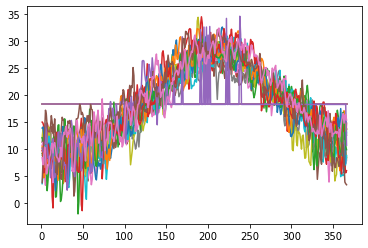

<Figure size 432x288 with 0 Axes>

In [10]:
temp = temp.fillna(temp["TAVG"].mean())

temp["Year"] = pd.to_datetime(temp["DATE"],format="%Y-%m-%d").dt.year

temp["Day"] = pd.to_datetime(temp["DATE"],format="%Y-%m-%d").dt.day_of_year

days_y = temp.groupby(by=["Day","Year"],as_index=False).mean()



for year in range(1956,2021,4):
    plt.plot(range(1,367),days_y.loc[days_y["Year"]==year]["TAVG"])
plt.figure()
plt.show()
    

## Οδηγίες Υποβολής

Θα πρέπει να υποβάλετε την εργασία σας με τη μορφή σημειωματαρίου (Jupyter notebook), το οποίο θα περιέχει το σύνολο του κώδικα και την ανάλυσή σας. Αυτό σημαίνει ότι το σημειωματάριο θα πρέπει να διαβάζεται και να γίνεται κατανοητό και ως κείμενο (αλλιώς η υποβολή θα ήταν απλώς ένα αρχείο Python). Ο σκοπός δεν είναι μόνο να δείξετε ότι ξέρετε να γράφετε κώδικα, αλλά να εξηγήσετε και να πείσετε τον αναγνώστη. θα πρέπει να υποβάλετε και όποια αρχεία δεδομένων χρησιμοποιείτε και να εξασφαλίσετε ότι το σημειωματάριο μπορεί να τρέξει χωρίς καμμία μετατροπή σε έναν άλλο υπολογιστή εκτός του δικού σας. Προσέξτε ιδιαιτέρως τα μονοπάτια ανάγνωσης των αρχείων, αυτά πρέπει να είναι σχετικά (relative paths) και όχι απόλυτα (absolute paths).

## Κώδικας Τιμής

Συνειδητοποιείτε ότι αυτή είναι ατομική εργασία και θα πρέπει να εργαστείτε μόνοι σας. Μπορείτε βεβαίως να αναζητήσετε βοήθεια στο διαδίκτυο, αλλά αυτή θα πρέπει να αφορά τη χρήση των εργαλείων, και ιδιωμάτων, δεν θα πρέπει να αναζητείτε την απάντηση στα ερωτήματα της εργασίας. Μπορείτε να συζητήσετε με άλλους που παρακολουθούν το μάθημα προκειμένου να λύσετε μεταξύ σας απορίες κατανόησης, αλλά όχι μεθόδους επίλυσης. Αναλογιστείτε ότι σκοπός του μαθήματος είναι να αποκομίσετε κάποιες γνώσεις, και όχι να ξοδέψετε απλώς τον χρόνο και τα χρήματά σας.